
# T5_Map_of_Science_Deber

Katherine Michelle Rivera Morales

*17/02/2022*

# Basado en las sesiones de Visualización de datos y Expresiones resulares. Realice una adaptación de la solución del MAP OF SCIENCE. Se requiere dos adaptaciones para resolver esta actividad:

- Buscar bibliografía de un tema de interés propio en la Página Web de PubMed,

- Realizar el minado de autores por país (en el ejemplo se encuentra realziado por las ciudades de USA).

- Para asignar las ubicación geográfica de los centroides de cada país (latitud y longitud), utilice la tabla      Ubicación Geográfica de Países - Google Developer. 

- Así como en la solución de referencia se señalan varias ciudades seleccionadas de USA, en su resolución   señale/resalte a los siguientes países: USA, UK, Brazil, China, Australia, Norway.  

# Cargue su cuaderno de Jupyter en GitHub, asegurandose de lo siguiente:

- en el documento se puede ver con claridad el Mapa de Ciencia de su tema de interés.

- la figura tiene etiquetas adecuadas en los ejes de la visualización. 

- se tiene al menos tres controles de la versión (3 commit con mensajes adecuados sobre la versión)

In [16]:
# Librerías

import re
import csv
import pandas as pd
import matplotlib.pyplot as pltb
import itertools

In [17]:
#abrimos el archivo de pubmed
with open('pubmed-proteusmir-set.txt',"r", encoding='utf-8-sig') as f:
    data = f.read()
#delimitamos con \n\s(para un espacio) {6} (con 6 repeticiones)     
data = re.sub(r'\n\s{6}',' ', data) 
print(data[:2000])

PMID- 31309490
OWN - NLM
STAT- MEDLINE
DCOM- 20200323
LR  - 20200323
IS  - 1940-6029 (Electronic)
IS  - 1064-3745 (Linking)
VI  - 2021
DP  - 2019
TI  - Proteus mirabilis Overview.
PG  - 1-4
LID - 10.1007/978-1-4939-9601-8_1 [doi]
AB  - Proteus mirabilis, a Gram-negative bacterium, commonly causes catheter-associated  urinary tract infections, wound infections, gastroenteritis and, in some cases,  bacteremia. The phenotypic hallmarks of this bacterium include swarming motility,  urease and hemolysin production, and synthesis of numerous adherence fimbriae. While  routine bacteriological methodology may often be used to study this pathogen,  frequently one requires specialized techniques to investigate the pathogenesis of  this species. Here, a brief overview of the discoveries associated with this  fascinating bacterium illuminates the need for the development of specialized  techniques to further probe the biology of P. mirabilis.
FAU - Mobley, Harry L T
AU  - Mobley HLT
AD  - Departme

In [18]:
paises = re.findall (r"\,\s[A-Z]+[A-z]{2,11}\.", data)
#se delimita otra vez con (r"\,\s[A-Z]+[A-z]{2,11}\." que nos dice que tomando una coma, un espacio que inicie con mayusculas de la A a la Z con otra mayuscula y una minuscula que tenga un rango de 2 a 11 
print (paises[:100])

[', USA.', ', Iran.', ', Iran.', ', Iran.', ', Iran.', ', USA.', ', USA.', ', USA.', ', USA.', ', Brazil.', ', Brazil.', ', Brazil.', ', Brazil.', ', Brazil.', ', Brazil.', ', Brazil.', ', Brazil.', ', Brazil.', ', USA.', ', Poland.', ', Poland.', ', Poland.', ', Poland.', ', Poland.', ', Poland.', ', Poland.', ', Poland.', ', Egypt.', ', Egypt.', ', Egypt.', ', Egypt.', ', USA.', ', Uruguay.', ', Uruguay.', ', Uruguay.', ', Uruguay.', ', Brazil.', ', Poland.', ', Poland.', ', Egypt.', ', Egypt.', ', Egypt.', ', Egypt.', ', China.', ', China.', ', China.', ', China.', ', France.', ', France.', ', France.', ', France.', ', France.', ', Poland.', ', Poland.', ', Poland.', ', Poland.', ', Egypt.', ', Egypt.', ', Egypt.', ', Florida.', ', Egypt.', ', USA.', ', Belgium.', ', Belgium.', ', Belgium.', ', Belgium.', ', Belgium.', ', Turkey.', ', Turkey.', ', Turkey.', ', USA.', ', Poland.', ', Poland.', ', Poland.', ', Poland.', ', Poland.', ', Poland.', ', Poland.', ', Poland.', ', Uruguay.',

In [19]:
unique_text =list(set(paises))
#se tranforma en una lista
unique_text.sort()
#se ordena y se elimina los que se repiten 
unico = unique_text
print(unico)

[', ADQGHGTVKFVGSIIDAPCS.', ', Adelaide.', ', Afula.', ', Alabama.', ', Albuquerque.', ', Algeria.', ', Alicante.', ', Alkmaar.', ', Amberg.', ', Amsterdam.', ', Angers.', ', Angola.', ', Antimicrob.', ', Apdo.', ', Apt.', ', Argentina.', ', Argentina].', ', Asp.', ', Asturias.', ', Australia.', ', Austria.', ', Avda.', ', BHR.', ', Bahrain.', ', Baku.', ', Baltimore.', ', Bangladesh.', ', Barcelona.', ', Basel.', ', Belgium.', ', Belgrade.', ', Benin.', ', Beograd.', ', Berkeley.', ', Berlin.', ', Bermuda.', ', Birmingham.', ', Bizkaia.', ', Bordeaux.', ', Boston.', ', Botswana.', ', Brasil.', ', Bratislava.', ', Braunschweig.', ', Brazil.', ', Brno.', ', Bruxelles.', ', Bulgaria.', ', Calif.', ', California.', ', Cameroon.', ', Cameroun.', ', Canada.', ', Carbohydr.', ', Cardiff.', ', Carr.', ', Casablanca.', ', Chandigarh.', ', Chengdu.', ', Chicago.', ', Chile.', ', Chile].', ', China.', ', Chongqing.', ', Citrobacter.', ', CntA.', ', Col.', ', Colombia.', ', Conn.', ', Crete.', ',

In [20]:
b = unique_text
#se eliman las caracteristicas que no son los que queremos 
 
b.remove(', ADQGHGTVKFVGSIIDAPCS.')    
b.remove(', Adelaide.')
b.remove(', Afula.')
b.remove(', Alabama.')
b.remove(', Albuquerque.')
b.remove(', Algeria.')
b.remove(', Alicante.')
b.remove(', Alkmaar.')
b.remove(', Amberg.')
b.remove(', Amsterdam.')
b.remove(', Angers.')
b.remove(', Angola.')
b.remove(', Antimicrob.')
b.remove(', Apdo.')
b.remove(', Apt.')
b.remove(', Argentina.')
b.remove(', Argentina].')
b.remove(', Asp.')
b.remove(', Asturias.')
b.remove(', Austria.')
b.remove(', Avda.')
b.remove(', BHR.')
b.remove(', Bahrain.')
b.remove(', Baku.')
b.remove(', Baltimore.')
b.remove(', Bangladesh.')
b.remove(', Barcelona.')
b.remove(', Basel.')
b.remove(', Belgium.')
b.remove(', Belgrade.')
b.remove(', Benin.')
b.remove(', Beograd.')
b.remove(', Berkeley.')
b.remove(', Berlin.')
b.remove(', Bermuda.')
b.remove(', Birmingham.')
b.remove(', Bizkaia.')
b.remove(', Bordeaux.')
b.remove(', Boston.')
b.remove(', Botswana.')
b.remove(', Bratislava.')
b.remove(', Braunschweig.') 
b.remove(', Brno.')
b.remove(', Bruxelles.')
b.remove(', Bulgaria.')
b.remove(', Calif.')
b.remove(', California.')
b.remove(', Cameroon.')
b.remove(', Cameroun.')
b.remove(', Canada.')
b.remove(', Carbohydr.')
b.remove(', Cardiff.')
b.remove(', Carr.')
b.remove(', Casablanca.')
b.remove(', Chandigarh.')
b.remove(', Chengdu.')
b.remove(', Chicago.')
b.remove(', Chile.')
b.remove(', Chile].') 
b.remove(', Chongqing.')
b.remove(', Citrobacter.')
b.remove(', CntA.')
b.remove(', Col.')
b.remove(', Colombia.')
b.remove(', Conn.')
b.remove(', Crete.')
b.remove(', Creteil.')
b.remove(', Croatia.')
b.remove(', Ctra.')
b.remove(', Cyprus.')
b.remove(', Dallas.')
b.remove(', Del.')
b.remove(', Denmark.')
b.remove(', Dept.')
b.remove(', Deutschland.')
b.remove(', Dist.')
b.remove(', Dordrecht.')
b.remove(', Drammen.')
b.remove(', Dublin.')
b.remove(', Ecuador.')
b.remove(', Egypt.')
b.remove(', England.')
b.remove(', Ent.')
b.remove(', Enterococcus.')
b.remove(', Esch.')
b.remove(', Esslingen.')
b.remove(', Ethiopia.')
b.remove(', FRG.')
b.remove(', Faz.')
b.remove(', Fed.')
b.remove(', FhlA.')
b.remove(', Fig.')
b.remove(', Finland.')
b.remove(', Firenze.')
b.remove(', Fla.')
b.remove(', Florida.')
b.remove(', France.')
b.remove(', Frankfurt.')
b.remove(', Fukuoka.')
b.remove(', GRD.')
b.remove(', GSH.')
b.remove(', Gabon.')
b.remove(', Garches.')
b.remove(', Georgia.')
b.remove(', Germany.')
b.remove(', Ghana.')
b.remove(', Giessen.')
b.remove(', Govt.')
b.remove(', Granada.')
b.remove(', Greece.')
b.remove(', Grenada.')
b.remove(', Guangzhou.')
b.remove(', Guildford.')
b.remove(', Halifax.')
b.remove(', Haryana.')
b.remove(', Hatfield.')
b.remove(', Hefei.')
b.remove(', Holstenstr.')
b.remove(', Houston.')
b.remove(', Hrvatska.')
b.remove(', Hungary.')
b.remove(', Hyderabad.')
b.remove(', IND.')
b.remove(', Ill.')
b.remove(', Illinois.')
b.remove(', Inc.')
b.remove(', India.')
b.remove(', Indonesia.')
b.remove(', Infect.')
b.remove(', Ing.')
b.remove(', Inhoffenstr.')
b.remove(', Innsbruck.')
b.remove(', Ioannina.')
b.remove(', Iowa.')
b.remove(', Iran.')
b.remove(', Iraq.')
b.remove(', Irbid.')
b.remove(', Ireland.')
b.remove(', Islamabad.')
b.remove(', Israel.')
b.remove(', Italia.')
b.remove(', Italien.')
b.remove(', Italy.')
b.remove(', JBU].')
b.remove(', Jaipur.')
b.remove(', Jamaica.')
b.remove(', Japan.')
b.remove(', Jena.')
b.remove(', Jerusalem.')
b.remove(', Jordan.')
b.remove(', Kano.')
b.remove(', Kaohsiung.')
b.remove(', Karachi.')
b.remove(', Katowice.')
b.remove(', Kazakhstan.')
b.remove(', Kentucky.')
b.remove(', Kenya.')
b.remove(', Kleb.')
b.remove(', Klebsiella.')
b.remove(', Korea.')
b.remove(', Kosice.')
b.remove(', Kosovo.')
b.remove(', Kragujevac.')
b.remove(', Kuwait.')
b.remove(', LLC.')
b.remove(', Lagos.')
b.remove(', Langkawi.')
b.remove(', Latvia.')
b.remove(', Lebanon.')
b.remove(', Lexington.')
b.remove(', Libya.')
b.remove(', Lithuania.')
b.remove(', Lodowa.')
b.remove(', Lodz.')
b.remove(', Lodzi.')
b.remove(', London.')
b.remove(', Loni.')
b.remove(', Louisiana.')
b.remove(', Ltd.')
b.remove(', Ludhiana.')
b.remove(', Ludwigsburg.')
b.remove(', Luxembourg.')
b.remove(', Maastricht.')
b.remove(', Madagascar.')
b.remove(', Madrid.')
b.remove(', Malawi.')
b.remove(', Malaysia.')
b.remove(', Mali.')
b.remove(', Manchester.')
b.remove(', Manitoba.')
b.remove(', Maroc.')
b.remove(', Maryland.')
b.remove(', Mass.')
b.remove(', Mauritius.')
b.remove(', Memphis.')
b.remove(', Merseyside.')
b.remove(', Messina.')
b.remove(', Mexico.')
b.remove(', Mexique.')
b.remove(', Michigan.')
b.remove(', Milano.')
b.remove(', Minnesota.')
b.remove(', Missouri.')
b.remove(', Modra.')
b.remove(', Mont.')
b.remove(', Montana.')
b.remove(', Morocco.')
b.remove(', Moscow.')
b.remove(', MrpH.')
b.remove(', Mumbai.')
b.remove(', Murcia.')
b.remove(', NSW.')
b.remove(', Namibia.')
b.remove(', Nepal.')
b.remove(', Netherlands.')
b.remove(', Nigeria.')
b.remove(', Nottingham.')
b.remove(', Nsukka.')
b.remove(', OHSS.')
b.remove(', Oklahoma.')
b.remove(', Olomouc.')
b.remove(', Oman.')
b.remove(', Ont.')
b.remove(', Ontario.')
b.remove(', Osterreich.')
b.remove(', Ottawa.')
b.remove(', Oviedo.')
b.remove(', PAK.')
b.remove(', Pakistan.')
b.remove(', Palestine.')
b.remove(', Panama.')
b.remove(', PapA.')
b.remove(', Paris.')
b.remove(', Pcia.')
b.remove(', Pediatrics.')
b.remove(', Penafiel.')
b.remove(', Pennsylvania.')
b.remove(', Peru.')
b.remove(', Peru].')
b.remove(', PhD.')
b.remove(', Philadelphia.')
b.remove(', Philippines.')
b.remove(', Poland.')
b.remove(', Poland].')
b.remove(', Polska.')
b.remove(', Portland.')
b.remove(', Portsmouth.')
b.remove(', Portugal.')
b.remove(', Postgrad.')
b.remove(', Praha.')
b.remove(', Pretoria.')
b.remove(', Proc.')
b.remove(', Prol.')
b.remove(', Prot.')
b.remove(', Prov.')
b.remove(', Pseud.')
b.remove(', Pudong.')
b.remove(', Qatar.')
b.remove(', Que.')
b.remove(', ROC.')
b.remove(', RTG.')
b.remove(', Rawalpindi.')
b.remove(', Ref.')
b.remove(', Richmond.')
b.remove(', Rod.')
b.remove(', Rohtak.')
b.remove(', Romania.')
b.remove(', Rome.')
b.remove(', Rostock.')
b.remove(', Rotterdam.')
b.remove(', Russia.')
b.remove(', SAR.')
b.remove(', SAU.')
b.remove(', Sal.')
b.remove(', Salm.')
b.remove(', Samsun.')
b.remove(', Sandomierz.')
b.remove(', Santiago.')
b.remove(', Schweiz.')
b.remove(', Scotland.')
b.remove(', Ser.')
b.remove(', Serbia.')
b.remove(', Serratia.')
b.remove(', Shatin.')
b.remove(', Sheffield.')
b.remove(', Singapore.')
b.remove(', Slovakia.')
b.remove(', Slovenia.')
b.remove(', Sofia.')
b.remove(', Somaliland.')
b.remove(', Sosnowcu.')
b.remove(', Southampton.')
b.remove(', Spain.')
b.remove(', Srbija.')
b.remove(', Staph.')
b.remove(', Str.')
b.remove(', Strasbourg.')
b.remove(', Strep.')
b.remove(', Strept.')
b.remove(', Succ.')
b.remove(', Sudan.')
b.remove(', Swden.')
b.remove(', Sweden.')
b.remove(', Switzerland.')
b.remove(', Taiwan.')
b.remove(', Tanzania.')
b.remove(', Tennessee.')
b.remove(', TetJ.')
b.remove(', Tex.')
b.remove(', Texas.')
b.remove(', Thailand.')
b.remove(', Thessaloniki.')
b.remove(', Tokyo.')
b.remove(', Torino.')
b.remove(', Tunisia.')
b.remove(', Tunisie.')
b.remove(', Turkey.')
b.remove(', UAE.')
b.remove(', Uganda.')
b.remove(', Uruguay.')
b.remove(', Utah.')
b.remove(', Utrecht.')
b.remove(', Valencia.')
b.remove(', Venezuela.')
b.remove(', Verdun.')
b.remove(', Veterinarpl.')
b.remove(', Vic.')
b.remove(', Victoria.')
b.remove(', Vietnam.')
b.remove(', Wales.')
b.remove(', Weinheim.')
b.remove(', Wilhelmstr.')
b.remove(', Wisconsin.')
b.remove(', Worcester.')
b.remove(', Wyoming.')
b.remove(', ZAF.')
b.remove(', Zambia.')
b.remove(', Zhejiang.')
b.remove(', Zimbabwe.')

In [21]:
 print() 
    
print('Los paises de interes son: ', b) 


Los paises de interes son:  [', Australia.', ', Brasil.', ', Brazil.', ', China.', ', Norway.', ', USA.', ', Ukraine.']


In [22]:
    c = "".join(b)
    d = c.split(", ")
    e = "".join(d)
    f = e.split(".")
    f.remove("")
    u = f
    print()
    print('La lista final es: ', u) 


La lista final es:  ['Australia', 'Brasil', 'Brazil', 'China', 'Norway', 'USA', 'Ukraine']


In [23]:
# Datos de excel
datos = pd.read_csv('./countryes_ubication.csv', engine='python', skipfooter=3)
datos.head(10)

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
5,AL,41.153332,20.168331,Albania
6,AM,40.069099,45.038189,Armenia
7,AN,12.226079,-69.060087,Netherlands Antilles
8,AO,-11.202692,17.873887,Angola
9,AQ,-75.250973,-0.071389,Antarctica


In [24]:
name = datos[datos.name.isin(u)]
name.head(10)

,country,latitude,longitude,name
13,AU,-25.274398,133.775136,Australia
28,BR,-14.235004,-51.925280,Brazil
45,CN,35.861660,104.195397,China
163,NO,60.472024,8.468946,Norway
224,UA,48.379433,31.165580,Ukraine


In [25]:
paises = datos[datos.country.isin(u)]
data =pd.concat([name,paises]).drop_duplicates().sort_values('name')
data.head(25)

,country,latitude,longitude,name
13,AU,-25.274398,133.775136,Australia
28,BR,-14.235004,-51.925280,Brazil
45,CN,35.861660,104.195397,China
163,NO,60.472024,8.468946,Norway
224,UA,48.379433,31.165580,Ukraine


In [26]:
# se importa las librerias necesarias

import matplotlib.pyplot as plt

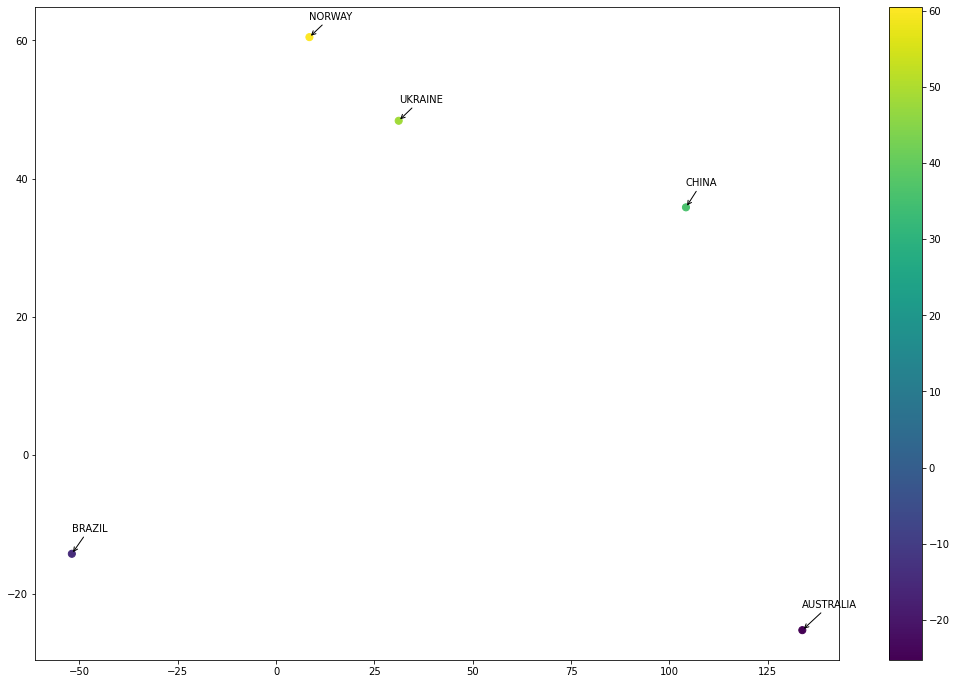

In [30]:

pltb.scatter(data.longitude, data.latitude, s=50, c=data.latitude)
pltb.colorbar()
ard = dict(arrowstyle="->")

plt.annotate('USA', xy = (-95.712891, 37.09024), 
               xytext = (-95.712891, 40), arrowprops = ard)
plt.annotate('UKRAINE', xy = (31.16558,48.379433), 
               xytext = (31.16558,51), arrowprops= ard)
plt.annotate('BRAZIL', xy = (-51.92528, -14.235004), 
               xytext = (-51.92528, -11), arrowprops= ard)
plt.annotate('CHINA', xy = (104.195397, 35.86166), 
               xytext = (104.195397, 39), arrowprops= ard)
plt.annotate('AUSTRALIA', xy = (133.775136, -25.274398), 
               xytext = (133.775136, -22), arrowprops= ard)
plt.annotate('NORWAY', xy = (8.468946, 60.472024), 
               xytext = (8.468946, 63), arrowprops= ard)

params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0] * 3, plSize[1] * 3) ) 